### Values

In [17]:
ITERATIONS = 20
TEST_SIZE = 0.3
FEATURES = ['other_units_assigned_quantity', 'ladders_assigned_quantity', 'engines_assigned_quantity']
TARGET_ATTRIBUTE = 'other_units_assigned_quantity'

### Read Json and validate Data

In [18]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/ny-emergency-ai/data/fire-incidents/interims.json')
df.dropna(inplace=True)

### Train Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

features = df[FEATURES]
target = df[TARGET_ATTRIBUTE]

features = pd.get_dummies(features)

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Errors [3.0365949744031536e-26, 1.4918705391555097e-27, 5.851183849314145e-27, 2.1746726803131575e-27, 7.859814960269328e-26, 5.403652867121096e-30, 2.0077187626076698e-25, 1.7103602584656054e-26, 5.0810854487937633e-26, 2.809604751140692e-26, 1.937149951832943e-26, 5.206752256147073e-26, 1.3528810204176548e-25, 9.247164046747249e-26, 7.320136400528738e-26, 3.5680064879957597e-26, 9.057032902218752e-26, 3.296573716388602e-26, 3.274736082719789e-26, 1.1047086096557636e-26]


### Plot Models

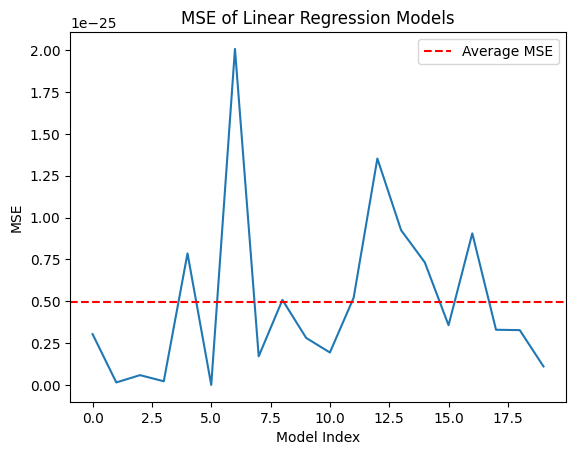

In [20]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

### Get Best Model

In [21]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', errors[best_model_index])

Best Model MSE 5.403652867121096e-30


### Save Model

In [22]:
import joblib

joblib.dump(best_model, f'../models/model.pkl')

categories = {col: list(features[col].unique()) for col in features.columns}
joblib.dump(categories, f'../models/categories.pkl')

['../models/categories.pkl']

### Get Feature Importances

Higher = more Important

In [23]:
feature_names = features.columns

feature_importances = best_model.coef_

feature_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_dict.items():
  print(f'Feature: {feature}, Importance: {importance}')

Feature: other_units_assigned_quantity, Importance: 0.9999999999999974
Feature: ladders_assigned_quantity, Importance: -1.7869221191807774e-16
Feature: engines_assigned_quantity, Importance: -7.220235845991945e-17
